# Simple Statistic Ananlysis and Tensorflow Neural Network
Check for normality, then check t-test against all subgroups  
  * Gender Differences  
  * Age Group Differences  

Built a simple NN to try and predict After Blood Pressure, given the rest of the data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/redbull-and-heart-rates/Redbull.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/redbull-and-heart-rates/Redbull.csv")

In [4]:
df.head()

,Volunteer_ID,sex,agegrp,bp_before,bp_after,Unnamed: 5
0,1,Male,30-45,143,153,NaN
1,2,Male,30-45,163,170,NaN
2,3,Male,30-45,153,168,NaN
3,4,Male,30-45,153,168,NaN
4,5,Male,30-45,146,161,NaN


In [5]:
bp_before = df.drop(columns=['bp_after', "Unnamed: 5"])
bp_after = df.drop(columns=['bp_before', "Unnamed: 5"])

In [6]:
bp_before = bp_before.rename(columns={"bp_before":"bp"})
bp_after = bp_after.rename(columns={"bp_after":"bp"})

In [7]:
bp_before['State'] = ["Before" for x in bp_before.index]
bp_after['State'] = ["After" for x in bp_after.index]

In [8]:
stack = pd.concat([bp_before, bp_after])
stack

,Volunteer_ID,sex,agegrp,bp,State
0,1,Male,30-45,143,Before
1,2,Male,30-45,163,Before
2,3,Male,30-45,153,Before
3,4,Male,30-45,153,Before
4,5,Male,30-45,146,Before
...,...,...,...,...,...
115,116,Female,60+,152,After
116,117,Female,60+,177,After
117,118,Female,60+,174,After
118,119,Female,60+,151,After


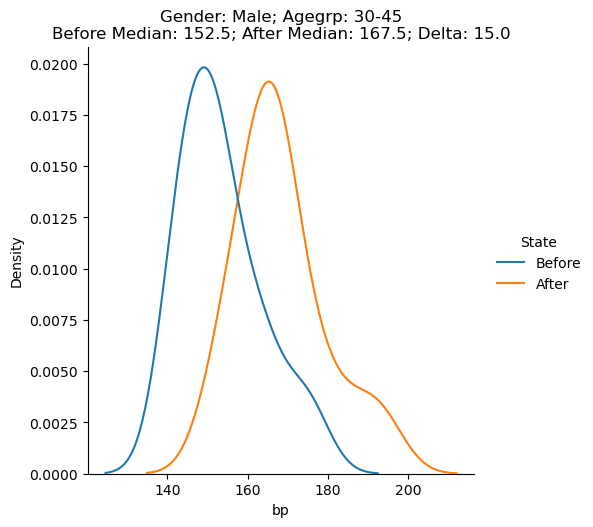

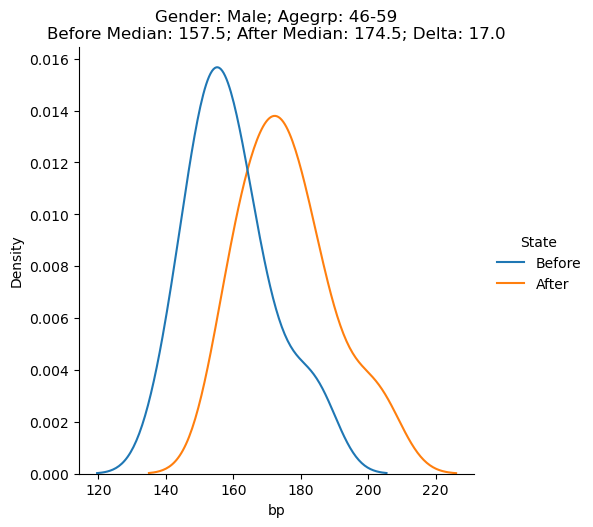

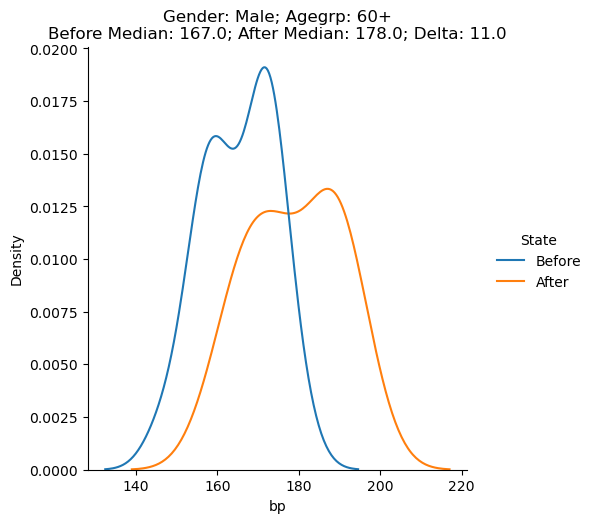

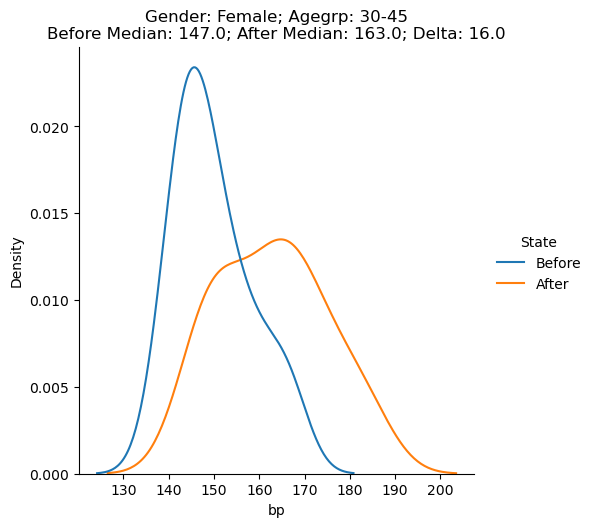

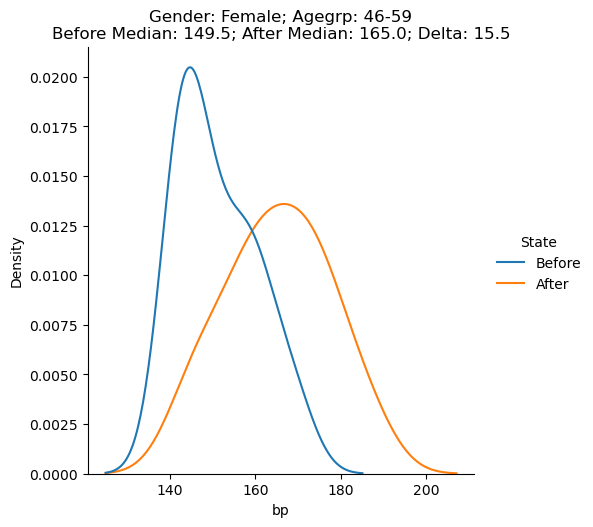

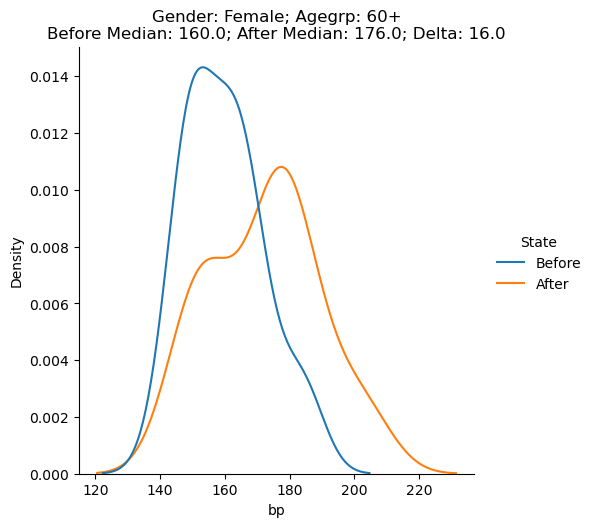

In [9]:
for gender in stack["sex"].unique():
    for age in stack["agegrp"].unique():
        temp_df = stack[(stack["sex"]==gender) & (stack["agegrp"]==age)]
        before_median = temp_df[temp_df["State"]=="Before"]['bp'].median()
        after_median = temp_df[temp_df["State"]=="After"]['bp'].median()
        delta = after_median - before_median
        sns.displot(data=temp_df, x="bp", hue='State', kind='kde').set(title="Gender: {}; Agegrp: {}\nBefore Median: {}; After Median: {}; Delta: {}".format(gender, age, before_median, after_median, delta))

In [10]:
import scipy

# Normality Test per Group
Each individual subgroup appears to be normal

In [11]:
for gender in stack["sex"].unique():
    for age in stack["agegrp"].unique():
        for status in stack["State"].unique():
            temp_df = stack[(stack["sex"]==gender) & (stack["agegrp"]==age) & (stack["State"]==status)]
            print("{}, {}, {}".format(gender, age, status))
            print(scipy.stats.normaltest(temp_df['bp']))
            print()

Male, 30-45, Before
NormaltestResult(statistic=3.3504576165708575, pvalue=0.18726532672128324)

Male, 30-45, After
NormaltestResult(statistic=4.167034965514876, pvalue=0.12449154428699002)

Male, 46-59, Before
NormaltestResult(statistic=2.070054245965941, pvalue=0.35521674625653216)

Male, 46-59, After
NormaltestResult(statistic=1.7970289022976191, pvalue=0.40717408767400975)

Male, 60+, Before
NormaltestResult(statistic=1.287012262770366, pvalue=0.525446904733103)

Male, 60+, After
NormaltestResult(statistic=2.55980521338836, pvalue=0.2780643807437246)

Female, 30-45, Before
NormaltestResult(statistic=2.323363095085437, pvalue=0.3129594819242434)

Female, 30-45, After
NormaltestResult(statistic=1.5346175112382807, pvalue=0.46426082788945644)

Female, 46-59, Before
NormaltestResult(statistic=2.3268873898123923, pvalue=0.3124084868081683)

Female, 46-59, After
NormaltestResult(statistic=0.5459191877687868, pvalue=0.7611235410534076)

Female, 60+, Before
NormaltestResult(statistic=1.5714

# T Test between Genders per AgeGroup
Between genders, there may be potentially a difference.  
46-59 shows strong evidence that there's a difference in means.  
30-45 and 60+ groups are above p-value of 0.05, but not by a lot.  

In [12]:
for age in stack["agegrp"].unique():
    for state in stack["State"].unique():
        temp_df = stack[(stack["agegrp"]==age) & (stack["State"]==state)]
        print(age, state)
        print(scipy.stats.ttest_ind(temp_df[temp_df["sex"]=='Male']['bp'], temp_df[temp_df["sex"]=='Female']['bp']))
        print()

30-45 Before
Ttest_indResult(statistic=1.2201451460186628, pvalue=0.22992814521097646)

30-45 After
Ttest_indResult(statistic=1.4706999897938813, pvalue=0.14960499190217175)

46-59 Before
Ttest_indResult(statistic=2.296324733530352, pvalue=0.02726295072089687)

46-59 After
Ttest_indResult(statistic=2.6324185451024973, pvalue=0.012187412463863009)

60+ Before
Ttest_indResult(statistic=1.6411278810098413, pvalue=0.10902326161811825)

60+ After
Ttest_indResult(statistic=1.4676893042327583, pvalue=0.15041756242474236)



# ANOVA of AgeGroups by Gender
Shows strong evidence that AgeGroups are different from each other

In [13]:
for gender in stack["sex"].unique():
    for state in stack["State"].unique():
        temp_df = stack[(stack["sex"]==gender) & (stack["State"]==state)]
        dataset = []
        for agegrp in temp_df["agegrp"].unique():
            dataset.append(temp_df[temp_df["agegrp"]==agegrp]['bp'])
        print(gender, state)
        print(scipy.stats.f_oneway(*dataset))
        print()

Male Before
F_onewayResult(statistic=6.3789668954316, pvalue=0.003162390859478194)

Male After
F_onewayResult(statistic=4.247696763907652, pvalue=0.019073344040751082)

Female Before
F_onewayResult(statistic=5.9536080641433635, pvalue=0.0044863102545844216)

Female After
F_onewayResult(statistic=2.548737336114421, pvalue=0.08706149585913502)



# Tensorflow NN
This doesn't really have to be a NN, but I'm using this as an opportunity for practice.

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [15]:
df = df.drop(columns="Unnamed: 5")

In [16]:
y = df["bp_after"]
X = df.drop(columns=["bp_after", "Volunteer_ID"])
X = pd.get_dummies(X, columns=['sex','agegrp'])

In [17]:
X.head()

,bp_before,sex_Female,sex_Male,agegrp_30-45,agegrp_46-59,agegrp_60+
0,143,0,1,1,0,0
1,163,0,1,1,0,0
2,153,0,1,1,0,0
3,153,0,1,1,0,0
4,146,0,1,1,0,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, shuffle=True)

In [19]:
inputs = tf.keras.layers.Input(shape=(6,))

In [20]:
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

In [21]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="predict_after")

In [22]:
model.compile(loss='mae',
                   optimizer='adam',
                   metrics=['mse','mae'])

In [23]:
model.summary()

Model: "predict_after"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


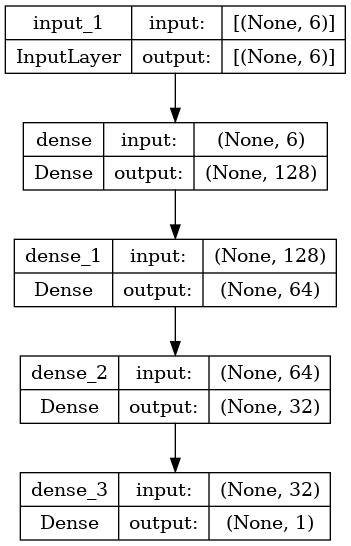

In [24]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

In [25]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_mae',patience=5,restore_best_weights=True)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[callbacks])

Epoch 1/100
3/3 [==============================] - 1s 146ms/step - loss: 157.0295 - mse: 24863.8418 - mae: 157.0295 - val_loss: 139.8914 - val_mse: 19697.4316 - val_mae: 139.8914
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 136.9214 - mse: 18889.2051 - mae: 136.9214 - val_loss: 122.9902 - val_mse: 15232.3145 - val_mae: 122.9902
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 119.9585 - mse: 14506.6172 - mae: 119.9585 - val_loss: 105.8253 - val_mse: 11285.3770 - val_mae: 105.8253
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 103.1740 - mse: 10753.5674 - mae: 103.1740 - val_loss: 89.2371 - val_mse: 8033.5688 - val_mae: 89.2371
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 86.5022 - mse: 7577.0742 - mae: 86.5022 - val_loss: 71.2439 - val_mse: 5131.5898 - val_mae: 71.2439
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 67.8600 - mse: 4686.2842 - mae: 67.8600 - val_

In [28]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 119ms/step


In [29]:
predictions = pd.concat([pd.DataFrame(y_pred, index=X_test.index), y_test],axis=1).rename(columns={0:"y_pred","bp_after":"y_test"})
predictions

,y_pred,y_test
53,185.944397,190
15,163.490311,167
106,185.889496,190
118,160.209213,151
23,171.129349,175
42,174.173080,168
72,151.611008,168
63,154.821030,158
31,197.881119,202
14,153.859268,153


In [30]:
predictions['delta'] = abs(predictions['y_test'] - predictions['y_pred'])

[Text(0.5, 1.0, 'After Blood Pressure: Delta of Predictions vs Actuals ')]

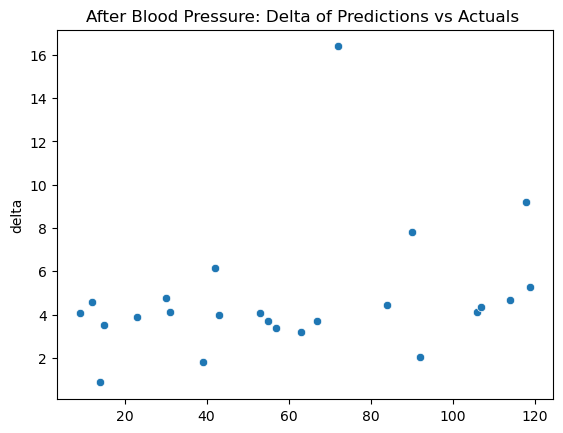

In [31]:
sns.scatterplot(data=predictions, x=predictions.index, y="delta").set(title="After Blood Pressure: Delta of Predictions vs Actuals ")